In [1]:
import yfinance as yf

In [2]:
eur=yf.Ticker("EURUSD=X")

#


<div style = "width: 1024px; height: 250px; line-height: em; overflow:scroll;  padding: 5px;">

Help on method history in module yfinance.base:

    
    
history(period='1mo', interval='1d', start=None, end=None, prepost=False, actions=True, auto_adjust=True, back_adjust=False, keepna=False, proxy=None, rounding=False, timeout=None, **kwargs) method of yfinance.ticker.Ticker instance
    
    
    :Parameters:
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
        auto_adjust: bool
            Adjust all OHLC automatically? Default is True
        back_adjust: bool
            Back-adjusted data to mimic true historical prices
        keepna: bool
            Keep NaN rows returned by Yahoo?
            Default is False
        proxy: str
            Optional. Proxy server URL scheme. Default is None
        rounding: bool
            Round values to 2 decimal places?
            Optional. Default is False = precision suggested by Yahoo!
        timeout: None or float
            If not None stops waiting for a response after given number of
            seconds. (Can also be a fraction of a second e.g. 0.01)
            Default is None.
        **kwargs: dict
            debug: bool
                Optional. If passed as False, will suppress
                error message printing to console."""

# EUR USD Weekly

In [3]:
hist = eur.history(interval='1wk',period='max')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,1.203398,1.219096,1.194401,1.217093,0,0,0
2003-12-08 00:00:00+00:00,1.216797,1.230603,1.212298,1.218502,0,0,0
2003-12-15 00:00:00+00:00,1.218695,1.244199,1.217804,1.235804,0,0,0
2003-12-22 00:00:00+00:00,1.235697,1.267202,1.235697,1.243394,0,0,0
2003-12-29 00:00:00+00:00,1.243394,1.264894,1.242993,1.263807,0,0,0
...,...,...,...,...,...,...,...
2022-10-03 00:00:00+01:00,0.979269,0.999420,0.973170,0.974032,0,0,0
2022-10-10 00:00:00+01:00,0.973501,0.980383,0.963595,0.972479,0,0,0
2022-10-17 00:00:00+01:00,0.973937,0.987362,0.970732,0.986291,0,0,0


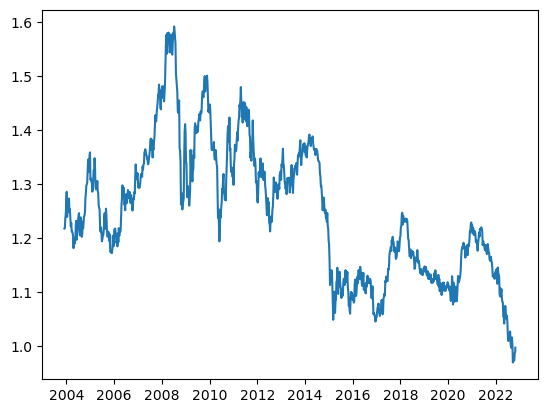

In [4]:
import matplotlib.pyplot as plt

plt.plot(hist.Close)

In [5]:
X=[]
Y=[]
end=4
x=hist.Close.dropna().values
for i in range(len(x)):
    if end>=len(x)-1:break
    X.append(x[i:end])
    Y.append(x[end])
    end+=1

In [6]:
x[:5],X[0],Y[0]

(array([1.21709287, 1.21850169, 1.23580372, 1.24339449, 1.26380706]),
 array([1.21709287, 1.21850169, 1.23580372, 1.24339449]),
 1.2638070583343506)

In [7]:
import numpy as np

X_arr,Y_arr=np.array(X),np.array(Y)

In [8]:
X_arr=X_arr.reshape(X_arr.shape[:][0],4,1)

In [9]:
X_train,X_test,y_train,y_test=X_arr[:-100],X_arr[-100:],Y_arr[:-100],Y_arr[-100:]

In [10]:
X_train.shape

(881, 4, 1)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [12]:
#Architecture
nn=Sequential(name='Sequence_LSTM')
nn.add(LSTM(50,activation='relu',input_shape=(4,1),name='input_layer_lstm'))
nn.add(Dense(50,name='Hidden_layer_Dense1',activation='LeakyReLU'))
nn.add(Dense(50,name='Hidden_layer_Dense2'))
nn.add(Dense(1,name='Output_layer_Dense'))
nn.compile(loss='mse',optimizer='adam')
nn.summary()

Model: "Sequence_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_lstm (LSTM)     (None, 50)                10400     
                                                                 
 Hidden_layer_Dense1 (Dense)  (None, 50)               2550      
                                                                 
 Hidden_layer_Dense2 (Dense)  (None, 50)               2550      
                                                                 
 Output_layer_Dense (Dense)  (None, 1)                 51        
                                                                 
Total params: 15,551
Trainable params: 15,551
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 1.2028
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.3954
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 13/100
9/9 [==============================] - 0s 2ms/st

In [14]:
pred=nn.predict(X_test)

4/4 [==============================] - 0s 2ms/step


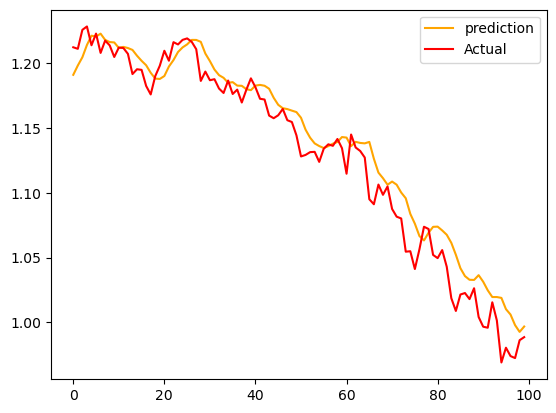

In [15]:
# plt.plot(hist.Close)
plt.plot(pred,label='prediction',color='orange')
plt.plot(y_test,label='Actual',color='red')
# plt.xticks(hist.index[:-100])
plt.legend()
plt.show()

In [16]:
fp = eur.history(interval='1wk',period='max')
fp.Close.values

array([1.21709287, 1.21850169, 1.23580372, 1.24339449, 1.26380706,
       1.28509927, 1.23880434, 1.25749791, 1.24770737, 1.26479816,
       1.27279902, 1.25079739, 1.25300717, 1.23639965, 1.2211951 ,
       1.22770178, 1.21150446, 1.2114017 , 1.20939457, 1.20229876,
       1.18080485, 1.19929957, 1.18930101, 1.18949902, 1.20010567,
       1.22400522, 1.23149681, 1.19650137, 1.21360695, 1.21749294,
       1.23330414, 1.24149573, 1.24570227, 1.2111963 , 1.20450008,
       1.22740054, 1.23780763, 1.23049664, 1.20170641, 1.20630169,
       1.22809386, 1.21749294, 1.2283051 , 1.2398026 , 1.24109519,
       1.24820566, 1.27289617, 1.28320289, 1.29689908, 1.29910624,
       1.30250728, 1.3271929 , 1.34500802, 1.32229662, 1.33139837,
       1.35270405, 1.35819733, 1.30759978, 1.30989492, 1.30430806,
       1.3024056 , 1.28549576, 1.28889227, 1.30710411, 1.32539856,
       1.32369673, 1.34740019, 1.33159339, 1.29580677, 1.28980672,
       1.29240716, 1.29190624, 1.30519331, 1.28620672, 1.28200

In [17]:
fp.Close

Date
2003-12-01 00:00:00+00:00    1.217093
2003-12-08 00:00:00+00:00    1.218502
2003-12-15 00:00:00+00:00    1.235804
2003-12-22 00:00:00+00:00    1.243394
2003-12-29 00:00:00+00:00    1.263807
                               ...   
2022-10-03 00:00:00+01:00    0.974032
2022-10-10 00:00:00+01:00    0.972479
2022-10-17 00:00:00+01:00    0.986291
2022-10-24 00:00:00+01:00    0.988650
2022-10-26 00:00:00+01:00    0.996512
Name: Close, Length: 986, dtype: float64

In [18]:
X=[]
end=3
x=fp.Close
for i in range(len(x)):
    end+=1
    if end>=len(x)-1:break
    X.append(x[i:end])

In [19]:
new_points=np.array(X)#.reshape(53, 4,1)
new_points.shape

(981, 4)

In [20]:
new_points=new_points.reshape(new_points.shape[:][0],4,1)

In [21]:
X[-1]

Date
2022-09-26 00:00:00+01:00    0.980488
2022-10-03 00:00:00+01:00    0.974032
2022-10-10 00:00:00+01:00    0.972479
2022-10-17 00:00:00+01:00    0.986291
Name: Close, dtype: float64

In [22]:
nn.predict(np.array(X[-1]).reshape(1,4,1))[0]

1/1 [==============================] - 0s 24ms/step


array([0.9968508], dtype=float32)

1/1 [==============================] - 0s 15ms/step
[0.9804883  0.97403234 0.97247881 0.98629051 0.99685079]
1/1 [==============================] - 0s 28ms/step


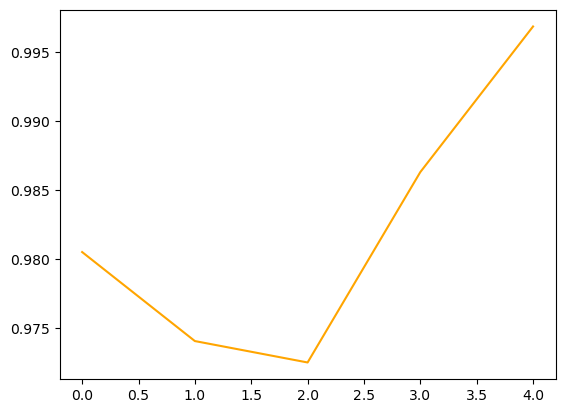

In [23]:
print(np.append(X[-1],nn.predict(np.array(X[-1]).reshape(1,4,1))[0]))
plt.plot(np.append(X[-1],nn.predict(np.array(X[-1]).reshape(1,4,1))[0]),color='orange')
plt.show()

31/31 [==============================] - 0s 952us/step


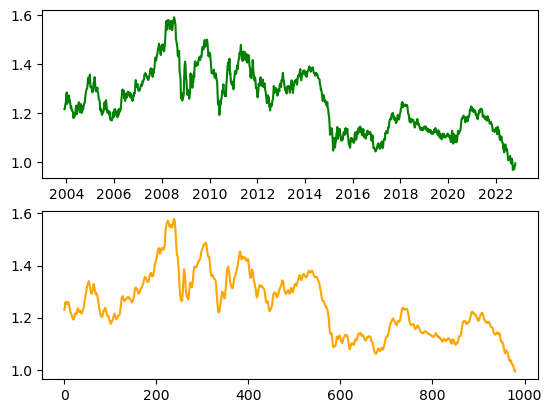

In [24]:
pred1=nn.predict(new_points)
plt.subplot(2,1,1)
plt.plot(x,label='input',color='green')
plt.subplot(2,1,2)
plt.plot(pred1,color='orange')
plt.show()

# eurusd 60min

In [39]:
eur_60min = eur.history(interval='1d',period='max')
eur_60min

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,1.203398,1.204007,1.194401,1.196501,0,0,0
2003-12-02 00:00:00+00:00,1.196101,1.210903,1.194600,1.208897,0,0,0
2003-12-03 00:00:00+00:00,1.209000,1.213003,1.207700,1.212298,0,0,0
2003-12-04 00:00:00+00:00,1.212004,1.214403,1.204398,1.208094,0,0,0
2003-12-05 00:00:00+00:00,1.207802,1.219096,1.206593,1.218695,0,0,0
...,...,...,...,...,...,...,...
2022-10-20 00:00:00+01:00,0.976648,0.984514,0.975553,0.976648,0,0,0
2022-10-21 00:00:00+01:00,0.977890,0.985698,0.970732,0.977890,0,0,0
2022-10-24 00:00:00+01:00,0.986009,0.988963,0.980892,0.986009,0,0,0


In [40]:
X=[]
Y=[]
end=2
x=eur_60min.Close.dropna().values

for i in range(len(x)):
    if end>=len(x)-1:break
    X.append(x[i:end])
    Y.append(x[end])
    end+=1

In [41]:
x

array([1.19650137, 1.20889747, 1.21229756, ..., 0.98600858, 0.98865032,
       0.99641293])

In [42]:
X[-1],Y[-2]

(array([0.97788996, 0.98600858]), 0.9860085844993591)

In [44]:
import numpy as np

X_arr,Y_arr=np.array(X),np.array(Y)

X_arr=X_arr.reshape(X_arr.shape[:][0],2,1)

X_train,X_test,y_train,y_test=X_arr[:-100],X_arr[-100:],Y_arr[:-100],Y_arr[-100:]


In [45]:

from keras.models import Sequential
from keras.layers import LSTM,Dense

#Architecture
nn=Sequential(name='Sequence_LSTM')
nn.add(LSTM(50,activation='relu',input_shape=(2,1),name='input_layer_lstm'))
nn.add(Dense(50,name='Hidden_layer_Dense1',activation='LeakyReLU'))
nn.add(Dense(50,name='Hidden_layer_Dense2'))
nn.add(Dense(1,name='Output_layer_Dense'))
nn.compile(loss='mse',optimizer='adam')
nn.summary()



Model: "Sequence_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_lstm (LSTM)     (None, 50)                10400     
                                                                 
 Hidden_layer_Dense1 (Dense)  (None, 50)               2550      
                                                                 
 Hidden_layer_Dense2 (Dense)  (None, 50)               2550      
                                                                 
 Output_layer_Dense (Dense)  (None, 1)                 51        
                                                                 
Total params: 15,551
Trainable params: 15,551
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn.fit(X_train,y_train,epochs=100,batch_size=100)


Epoch 1/100
49/49 [==============================] - 1s 2ms/step - loss: 0.4595
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 8/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11/100
49/49 [==============================] - 0s 2ms/step - loss: 8.9759e-04
Epoch 12/100
49/49 [==============================] - 0s 2ms/step - loss: 6.4887e-04
Epoch 13/100
49/49 [=========

Epoch 98/100
49/49 [==============================] - 0s 2ms/step - loss: 1.7756e-04
Epoch 99/100
49/49 [==============================] - 0s 2ms/step - loss: 1.0449e-04
Epoch 100/100
49/49 [==============================] - 0s 2ms/step - loss: 1.2532e-04


4/4 [==============================] - 0s 4ms/step


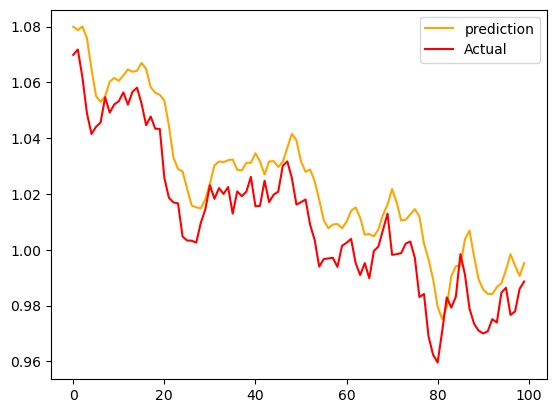

In [47]:

pred=nn.predict(X_test)

# plt.plot(hist.Close)
plt.plot(pred,label='prediction',color='orange')
plt.plot(y_test,label='Actual',color='red')
# plt.xticks(hist.index[:-100])
plt.legend()
plt.show()


In [57]:

fp = eur.history(interval='60m',period='1w')
fp.Close.values

X=[]
end=2
x=fp.Close
for i in range(len(x)):
    end+=1
    if end>=len(x)-1:break
    X.append(x[i:end])
    
new_points=np.array(X).reshape(new_points.shape[:][0],2,1)#.reshape(53, 4,1)

nn.predict(np.array(X[-1]).reshape(1,2,1))[0]

print(np.append(X[-1],nn.predict(np.array(X[-1]).reshape(1,2,1))[0]))
plt.plot(np.append(X[-1],nn.predict(np.array(X[-1]).reshape(1,2,1))[0]),color='orange')
plt.show()



ValueError: cannot reshape array of size 0 into shape (981,2,1)

In [59]:
fp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-10-26 00:00:00+01:00,0.996115,0.996810,0.996016,0.996214,0,0,0
2022-10-26 00:45:49+01:00,0.996314,0.996314,0.996314,0.996314,0,0,0


In [ ]:
pred1=nn.predict(new_points)
plt.subplot(2,1,1)
plt.plot(x,label='input',color='green')
plt.subplot(2,1,2)
plt.plot(pred1,color='orange')
plt.show()